In [1]:
import os
import tensorflow as tf 
import cv2
import imghdr
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

C:\Users\Hp\AppData\Local\Temp\ipykernel_1008\2984829806.py:4: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [2]:
tf.config.list_physical_devices('GPU')

[]

In [3]:
data_dir= "data"

In [4]:
os.listdir(data_dir)

['happy_imgs', 'sad_imgs', 'test_imgs']

In [5]:
a= os.path.join(data_dir, 'happy_imgs')

In [6]:
os.listdir(a)

['05-12-21-happy-people.jpg',
 '1000_F_165246984_Ihe5LVattiq8zEPivcPqrtM85x7noWJw.jpg',
 '1920px-face-smile.svg_.png',
 '1934412-happiness-1553188821.jpg',
 '220px-Happy_People_A_Year_in_the_Taiga_poster.jpg',
 '2560px-Happy_People.jpg',
 '35438_hd.jpg',
 '56f455011e0000b300705475.jpeg',
 '8e06de1bf2171da2312b6de61c61e4bc.jpg',
 '9b65a25adca61c48bcb01370116723e3.jpg',
 'A_Sep20_14_1189155141.jpg',
 'business-people-succesful-celebrating-group-successful-39416686-800x500.jpg',
 'compassion-900x387.jpg',
 'GettyImages-565706549-949x534.jpg',
 'goup-happy-people-35582464.jpg',
 'group-of-happy-people-2.jpg',
 'happy-people-2.jpg',
 'happy-people-group-fb.jpg',
 'happy-people-in-the-poppy-field-1280x800-wide-wallpapers-net.jpg',
 'happy-people-pexels-rodnae-productions-8927342.jpg',
 'happy-people.jpeg',
 'happy-people2.jpg',
 'happy-woman-in-nature-at-sunset.jpg',
 'Happy.jpg',
 'happy_1_1678616873966_1678616915228_1678616915228.jpg',
 'Happy_guy.jpg',
 'hology-happy-people-young-woman-ru

In [7]:
image_extentions= [ 'jpeg', 'png', 'bmp']

In [8]:
import matplotlib.image as mpimg


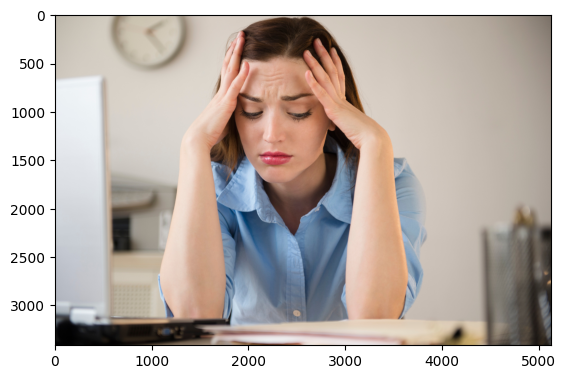

In [9]:
imgpath= 'C:\\Users\\Hp\\Desktop\\ML_things\\deep_learning_things\\NN_classifier\\data\\sad_imgs\\crying-at-work.jpg'

img= mpimg.imread(imgpath)
plt.imshow(img)


In [10]:
# using cv2 to read images as numpy arrays
img= cv2.imread(os.path.join(data_dir, 'sad_imgs','crying-at-work.jpg' ))
img.shape

(3412, 5126, 3)

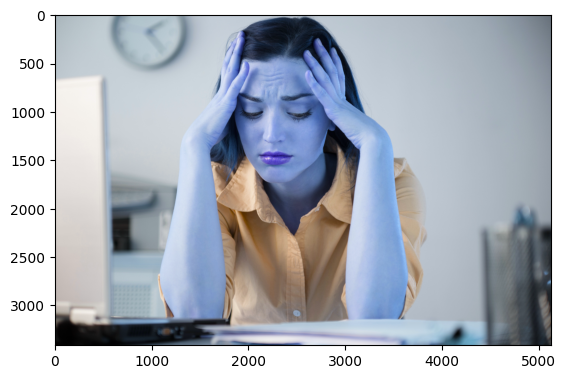

In [11]:
plt.imshow(img)

### Check if images are in correct formats

In [12]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path= os.path.join(data_dir, image_class, image)
        try:
            img=cv2.imread(image_path)
            img_format= imghdr.what(img)
            if img_format not in image_extentions:
                os.remove(image_path)
        except Exception as e:
            print("issue with image")

issue with image
issue with image
issue with image
issue with image
issue with image
issue with image
issue with image
issue with image
issue with image
issue with image
issue with image
issue with image
issue with image
issue with image
issue with image
issue with image
issue with image
issue with image
issue with image
issue with image
issue with image
issue with image
issue with image
issue with image
issue with image
issue with image
issue with image
issue with image
issue with image
issue with image
issue with image
issue with image
issue with image
issue with image
issue with image
issue with image
issue with image
issue with image
issue with image
issue with image
issue with image
issue with image
issue with image
issue with image
issue with image
issue with image
issue with image
issue with image
issue with image
issue with image
issue with image
issue with image
issue with image
issue with image
issue with image
issue with image
issue with image
issue with image
issue with ima

### Load images

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [14]:
datagen = ImageDataGenerator(rescale=1/255)

In [15]:
train_data= datagen.flow_from_directory('C:\\Users\\Hp\\Desktop\\ML_things\\deep_learning_things\\NN_classifier\\data',
                                        target_size= (300,300),
                                        batch_size= 5,
                                        class_mode= 'binary')

Found 138 images belonging to 3 classes.


In [16]:
train_data.class_indices

{'happy_imgs': 0, 'sad_imgs': 1, 'test_imgs': 2}

### Training time

In [17]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout



In [18]:
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(300, 300, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())  # Flatten the output before the Dense layers
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [19]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 149, 149, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 35, 35, 64)        0

In [21]:
model.fit(train_data, epochs=10)

Epoch 1/10
28/28 [==============================] - 18s 554ms/step - loss: 1.7207 - accuracy: 0.5507
Epoch 2/10
28/28 [==============================] - 17s 593ms/step - loss: 0.6148 - accuracy: 0.7101
Epoch 3/10
28/28 [==============================] - 15s 538ms/step - loss: 0.3232 - accuracy: 0.8043
Epoch 4/10
28/28 [==============================] - 16s 565ms/step - loss: 0.0792 - accuracy: 0.8116
Epoch 5/10
28/28 [==============================] - 18s 619ms/step - loss: -0.3932 - accuracy: 0.8478
Epoch 6/10
28/28 [==============================] - 18s 633ms/step - loss: -0.4195 - accuracy: 0.7536
Epoch 7/10
28/28 [==============================] - 16s 549ms/step - loss: 0.4382 - accuracy: 0.7536
Epoch 8/10
28/28 [==============================] - 18s 638ms/step - loss: -3.0786 - accuracy: 0.8768
Epoch 9/10
28/28 [==============================] - 16s 535ms/step - loss: -10.9283 - accuracy: 0.9058
Epoch 10/10
28/28 [==============================] - 16s 559ms/step - loss: -34.6134 -

### Testing

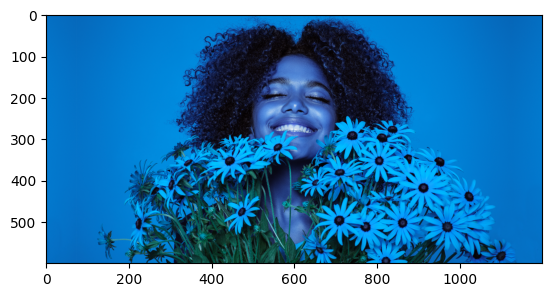

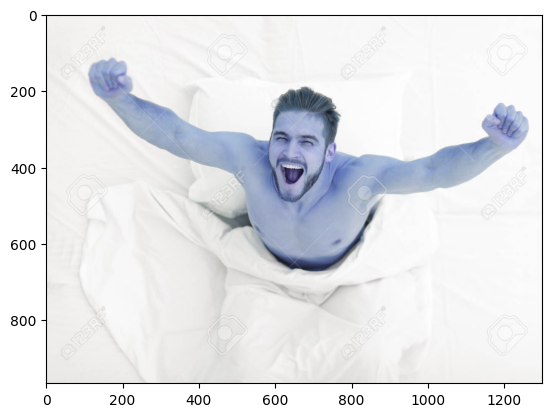

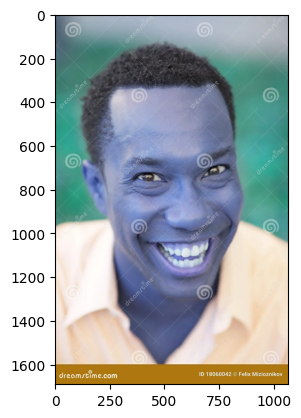

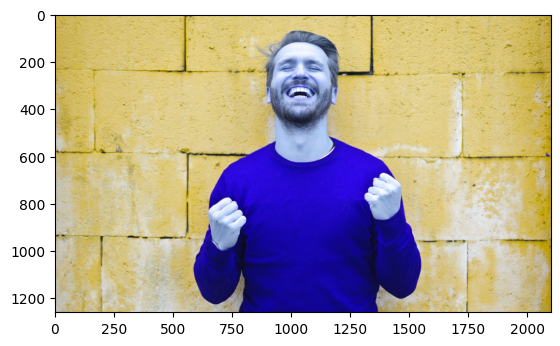

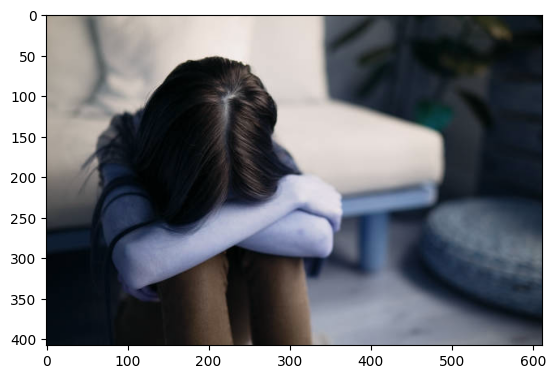

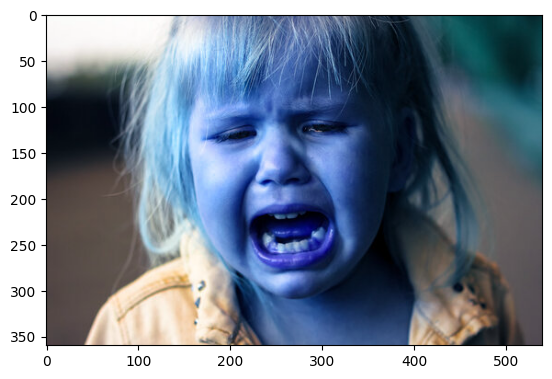

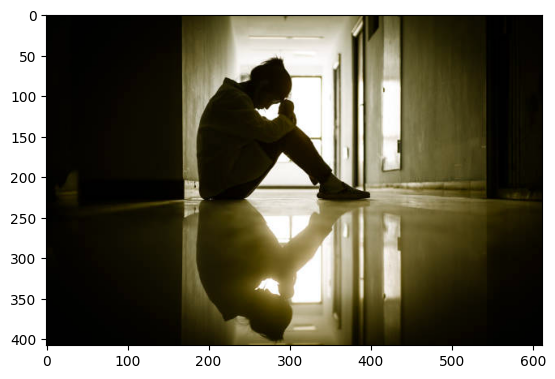

In [30]:
test_dir= os.path.join(data_dir, 'test_imgs')
for folder in os.listdir(test_dir):
    folder_paths= os.path.join(test_dir,folder)
    image_lists=os.listdir(folder_paths)
    for image in image_lists:
        image_path= os.path.join(folder_paths, image)
        image= cv2.imread(image_path)
        
        plt.imshow(image)
        plt.show()
     

In [31]:
test_data= datagen.flow_from_directory('C:\\Users\\Hp\\Desktop\\ML_things\\deep_learning_things\\NN_classifier\\data\\test_imgs',
                                        target_size= (300,300),
                                        batch_size= 5,
                                        class_mode= 'binary')

Found 6 images belonging to 2 classes.


In [32]:
test_data.class_indices

{'test_happy': 0, 'test_sad': 1}

### Predicting

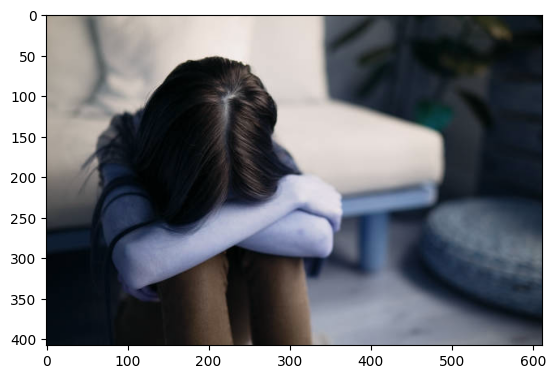

In [33]:
testimg= cv2.imread('C:\\Users\\Hp\\Desktop\\ML_things\\deep_learning_things\\NN_classifier\\data\\test_imgs\\test_sad\\1.jpg')
plt.imshow(testimg)

In [34]:
resize = tf.image.resize(testimg, (300,300))
resize= resize.numpy().astype(int)


(300, 300, 3)

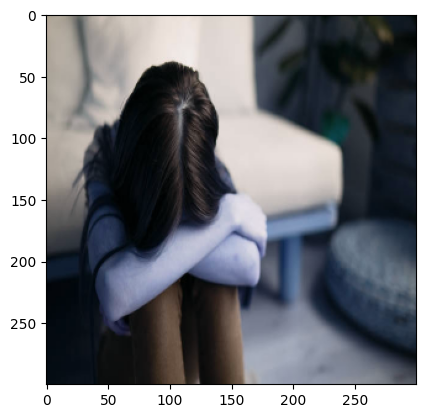

In [35]:
plt.imshow(resize)
resize.shape

In [36]:
yhat = model.predict(np.expand_dims(resize/255, 0))


1/1 [==============================] - 0s 443ms/step


In [37]:
yhat

array([[1.]], dtype=float32)

In [38]:
predictions= model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 126ms/step


In [39]:
predictions

array([[1.]], dtype=float32)

In [40]:
tf.keras.utils.plot_model(model, show_shapes=True, dpi=64)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
